<a href="https://colab.research.google.com/github/jpmucciolo/Curso-Ocean-19-03---Ciencia-de-Dados/blob/main/Curso_Ocean_19_03_ciencia_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np                        #matematica
import pandas as pd                       #leitura de arquivo
import seaborn as sns                     #graficos
import matplotlib.pyplot as plt           #graficos

# **Conhecendo o DataSet**

In [6]:
df = pd.read_csv('train.csv', index_col='id')       #definição do data frame

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,technician,divorced,professional.course,NaN,yes,no,telephone,jun,mon,56,8,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,no
1,36,management,married,university.degree,no,yes,no,cellular,nov,tue,267,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
2,53,blue-collar,married,high.school,no,yes,yes,cellular,jul,mon,243,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
3,45,blue-collar,single,basic.9y,no,yes,no,cellular,aug,wed,249,1,4,1,success,-2.9,92.201,-31.4,0.879,5076.2,no
4,60,housemaid,married,high.school,NaN,yes,no,telephone,may,wed,74,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [12]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.023497,258.185492,2.566862,962.058189,0.173946,0.082222,93.576416,-40.505555,3.620484,5166.966047
std,10.412653,259.579105,2.765626,187.939691,0.497441,1.571009,0.578585,4.623600,1.735310,72.360902
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


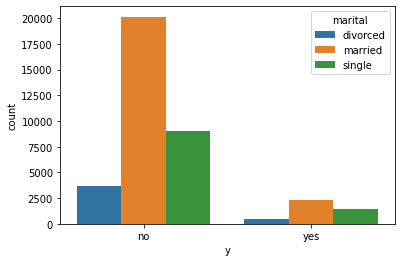

In [13]:
sns.countplot(data=df, x='y', hue='marital')

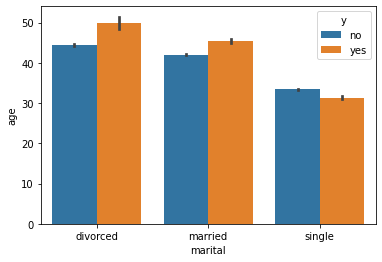

In [14]:
sns.barplot(data=df, x='marital', y='age', hue='y')

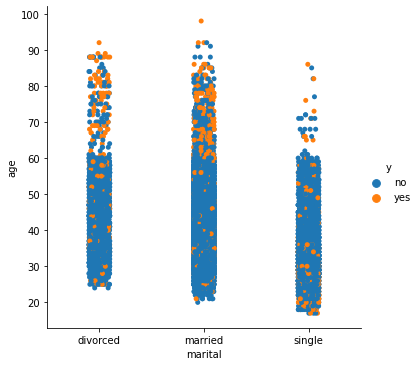

In [15]:
sns.catplot(data=df, x='marital', y='age', hue='y')
plt.show()

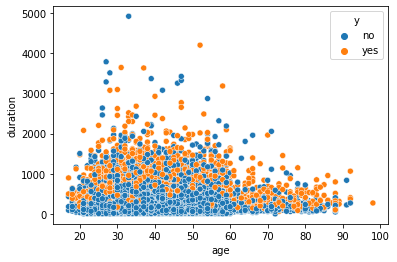

In [16]:
sns.scatterplot(x='age', y='duration', data=df, hue='y')
plt.show()

# **Modelando**